## Initiation à la Regression Linéaire


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [4]:
df = pd.read_csv('../datasets/income.csv')
df.head()

,age,experience,income
0,25,1,30450
1,30,3,35670
2,47,2,31580
3,32,5,40130
4,43,10,47830


### Statistiques descriptives

In [5]:
df.describe()

,age,experience,income
count,20.000000,20.000000,20.000000
mean,39.650000,6.200000,40735.500000
std,10.027725,4.124382,8439.797625
min,23.000000,1.000000,27840.000000
25%,31.500000,3.750000,35452.500000
50%,40.000000,5.000000,40190.000000
75%,47.000000,9.000000,45390.000000
max,58.000000,17.000000,63600.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   age         20 non-null     int64
 1   experience  20 non-null     int64
 2   income      20 non-null     int64
dtypes: int64(3)
memory usage: 612.0 bytes


- Le dataset ne comporte pas de valeurs manquantes, et toutes les données sont de types integer

### Distribution des valeurs pour chaque colonne

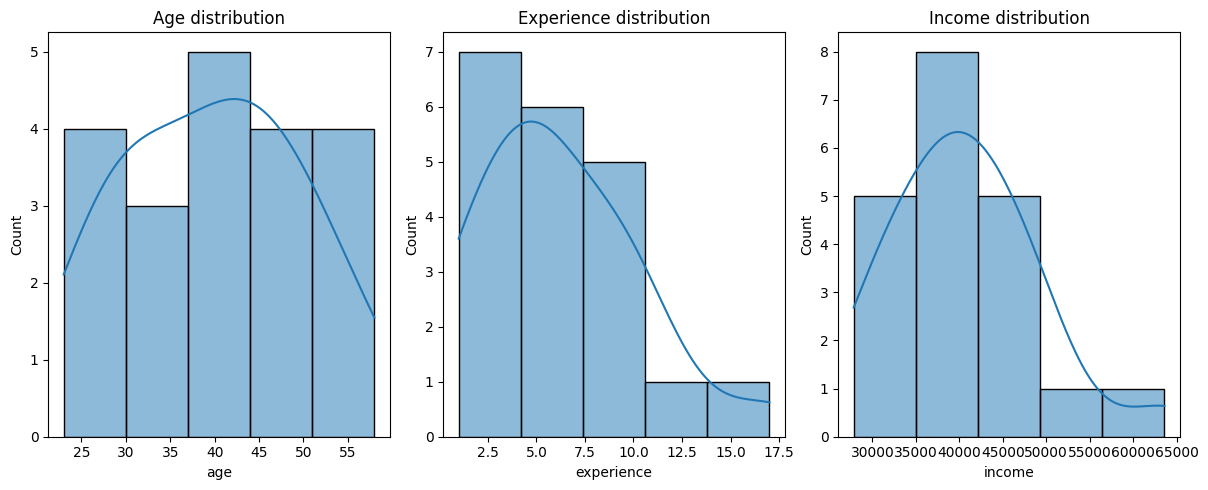

In [29]:
plt.figure(figsize=(12,5))

plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, bins=5)
plt.title('Age distribution')

plt.subplot(1, 3, 2)
sns.histplot(df['experience'], kde=True, bins=5)
plt.title('Experience distribution')

plt.subplot(1, 3, 3)
sns.histplot(df['income'], kde=True, bins=5)
plt.title('Income distribution')

plt.tight_layout()
plt.show()

- on remarque une certaine similarité dans la tendance de distribution des données, en observant la courbe de distribution pour chacune
- il semblerait qu'il y ait une influence notable entre l'expérience et les salaires

### Visualisation si représentation linéaire entre les variables

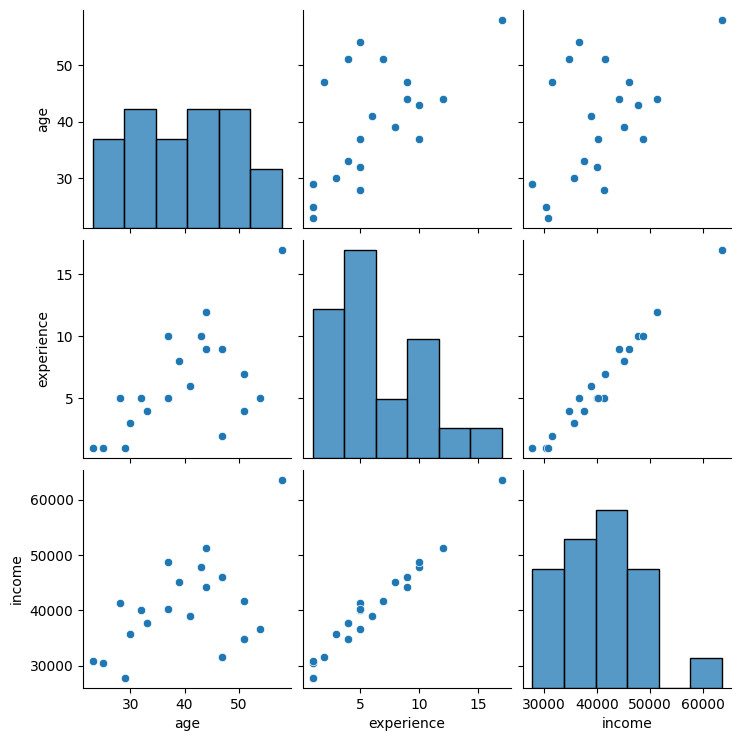

In [33]:
sns.pairplot(df)

- on remarque une influence linéaire entre les variables d'expériences et de salaire, et une linéarité bien moindre entre l'age et le salaire
- nos variables de prédictions ont donc une forte influence sur les salaires
- un model de régression linéaire semble être adapté

### Corrélation entre les variables

<Axes: >

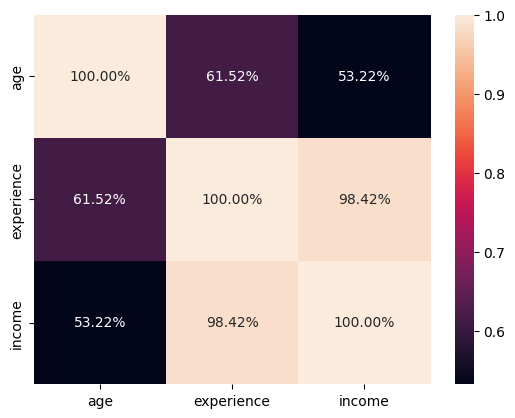

In [37]:
income_correlation = df.corr()
sns.heatmap(income_correlation, annot=True, fmt=".2%")

* on constate une corrélation forte entre l'expérience et le salaire:
    - la corrélation est de 98%
    - l'expérience a une forte influence sur les salaires
* la corrélation entre l'age et le salaire est très moyenne:
    - corrélation de 53%
    - l'influence de l'age existe mais reste modérée

L'experience est donc un prédicateur très significatif des salaires


### Model de Régression Linéaire